<a href="https://colab.research.google.com/github/AMROSE-SAKARIA/Tumor_detection/blob/main/tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip "/content/archive (2).zip"

Archive:  /content/archive (2).zip
  inflating: Testing/glioma_tumor/image(1).jpg  
  inflating: Testing/glioma_tumor/image(10).jpg  
  inflating: Testing/glioma_tumor/image(100).jpg  
  inflating: Testing/glioma_tumor/image(11).jpg  
  inflating: Testing/glioma_tumor/image(12).jpg  
  inflating: Testing/glioma_tumor/image(13).jpg  
  inflating: Testing/glioma_tumor/image(14).jpg  
  inflating: Testing/glioma_tumor/image(15).jpg  
  inflating: Testing/glioma_tumor/image(16).jpg  
  inflating: Testing/glioma_tumor/image(17).jpg  
  inflating: Testing/glioma_tumor/image(18).jpg  
  inflating: Testing/glioma_tumor/image(19).jpg  
  inflating: Testing/glioma_tumor/image(2).jpg  
  inflating: Testing/glioma_tumor/image(20).jpg  
  inflating: Testing/glioma_tumor/image(21).jpg  
  inflating: Testing/glioma_tumor/image(22).jpg  
  inflating: Testing/glioma_tumor/image(23).jpg  
  inflating: Testing/glioma_tumor/image(24).jpg  
  inflating: Testing/glioma_tumor/image(25).jpg  
  inflating: Tes

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob

In [ ]:
rd1 ="/content/Training"
noi ={}

for dir in os.listdir(rd1):
  noi[dir]=len(os.listdir(os.path.join(rd1,dir)))


In [ ]:
noi.items()

dict_items([('glioma_tumor', 826), ('no_tumor', 395), ('meningioma_tumor', 822), ('pituitary_tumor', 827)])

In [ ]:
#if not os.path.exists("./train2"):
 # os.mkdir("./train2")

  #for dir in os.listdir(rd):
  #  os.makedirs("./train2/"+dir)
#

    #for img in np.random.choice(a=os.listdir(os.path.join(rd,dir)),size=(math.floor(80/100*noi[dir])-2),replace=False):
    #  o=os.path.join(rd,dir,img)
     # d=os.path.join("./train2",dir)
     # shutil.copy(o,d)
     ## os.remove(o)
#else:
  #print("folder alredy existed")#


In [ ]:
def folder(p, split,rd):
    output_dir = f"./{p}"

    if not os.path.exists(output_dir):
        os.mkdir(output_dir)

        for dir in os.listdir(rd):
            class_input_path = os.path.join(rd, dir)
            class_output_path = os.path.join(output_dir, dir)

            if not os.path.isdir(class_input_path):
                continue  # Skip non-directories

            os.makedirs(class_output_path, exist_ok=True)

            files_in_dir = os.listdir(class_input_path)
            total_files = len(files_in_dir)
            noi[dir] = total_files  # Optionally update the dictionary if needed

            # Calculate sample size
            desired_size = math.floor(split * total_files) - 2
            sample_size = max(0, min(desired_size, total_files))

            if sample_size > 0 and total_files > 0:
                sampled_files = np.random.choice(files_in_dir, size=sample_size, replace=False)

                for img in sampled_files:
                    src = os.path.join(class_input_path, img)
                    dst = os.path.join(class_output_path, img)
                    shutil.copy(src, dst)
                    # os.remove(src)  # Uncomment to remove original files

            elif sample_size == 0:
                print(f"Skipping directory '{dir}': sample size is 0.")
            else:
                print(f"Skipping directory '{dir}': directory is empty.")
    else:
        print(f"Folder '{p}' already exists.")

In [ ]:
folder("train",0.8,rd1)

In [ ]:
folder("val",0.2,rd1)

In [ ]:

noi ={}
for dir in os.listdir(rd1):
  noi[dir]=len(os.listdir(os.path.join(rd1,dir)))
noi.items()

dict_items([('glioma_tumor', 826), ('no_tumor', 395), ('meningioma_tumor', 822), ('pituitary_tumor', 827)])

# **model**


In [ ]:
from keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization,GlobalAveragePooling2D
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization

model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(4, activation='softmax'))  # 4 classes

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 220, 220, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 108, 108, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     5,537,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,636,516 (21.50 MB)

 Trainable params: 5,636,036 (21.50 MB)

 Non-trainable params: 480 (1.88 KB)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
def ppimg(path):
  img=ImageDataGenerator( zoom_range=.2,shear_range=.2,rescale=1./255,horizontal_flip=True)
  image=img.flow_from_directory(directory=path, target_size=(224,224),batch_size=32,class_mode='categorical')
  return image

In [ ]:
def ppimg2(path):
  img=ImageDataGenerator(rescale=1/255)
  image=img.flow_from_directory(directory=path, target_size=(224,224),batch_size=32,class_mode='categorical')
  return image

In [ ]:
path="/content/train"
train_data=ppimg(path)


Found 2286 images belonging to 4 classes.


In [ ]:
path="/content/val"
val_data=ppimg2(path)

Found 565 images belonging to 4 classes.


In [ ]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

es = EarlyStopping(monitor='val_accuracy',min_delta=0.01,patience=8,verbose=1, mode='auto')
mc=ModelCheckpoint(filepath="./best_model.keras",monitor='val_accuracy',verbose=1,save_best_only=True)


cd=[es,mc]



In [ ]:
hs= model.fit(train_data,steps_per_epoch=25,epochs=50,verbose=1,callbacks=cd,validation_data=val_data,validation_steps=21)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - accuracy: 0.4431 - loss: 8.1433
Epoch 1: val_accuracy improved from -inf to 0.28850, saving model to ./best_model.keras


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


25/25 ━━━━━━━━━━━━━━━━━━━━ 30s 644ms/step - accuracy: 0.4426 - loss: 8.0399 - val_accuracy: 0.2885 - val_loss: 5.9355
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step - accuracy: 0.3609 - loss: 1.4867
Epoch 2: val_accuracy improved from 0.28850 to 0.29204, saving model to ./best_model.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 529ms/step - accuracy: 0.3615 - loss: 1.4837 - val_accuracy: 0.2920 - val_loss: 13.0640
Epoch 3/50
22/25 ━━━━━━━━━━━━━━━━━━━━ 1s 648ms/step - accuracy: 0.3977 - loss: 1.3359
Epoch 3: val_accuracy did not improve from 0.29204
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 621ms/step - accuracy: 0.4014 - loss: 1.3421 - val_accuracy: 0.2885 - val_loss: 15.7243
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step - accuracy: 0.4345 - loss: 1.1824
Epoch 4: val_accuracy did not improve from 0.29204
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 500ms/step - accuracy: 0.4333 - loss: 1.1834 - val_accuracy: 0.2885 - val_loss: 7.3720
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step - accuracy: 0.4583 - lo

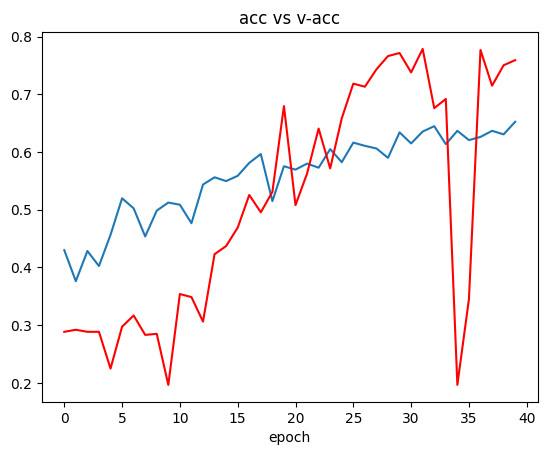

In [ ]:
h=hs.history
import matplotlib.pyplot as plt
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'],c="red")
plt.xlabel("epoch")
plt.title("acc vs v-acc")
plt.show()

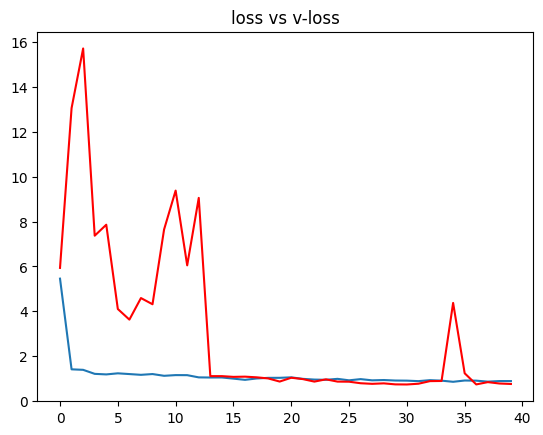

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'],c="red")
plt.title("loss vs v-loss")
plt.show()

In [ ]:
rd2="/content/Testing"
folder("test2",.2,rd2)

In [ ]:
path="/content/test2"
test_data=ppimg2(path)

Found 70 images belonging to 4 classes.


In [ ]:
from keras.models import load_model
model=load_model("/content/best_model.keras")

In [ ]:
acc = model.evaluate(test_data)[1]
print(f"The accuracy of the model is = {acc*100} %")

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 612ms/step - accuracy: 0.4135 - loss: 1.5712
The accuracy of the model is = 42.85714328289032 %
